# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [9]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
df.shape

(4324, 9)

In [12]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [13]:
dt = df.dropna() #df.dropna(axis=1, inplace=True) if you want to modify df directly . 



## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [15]:
dt.isnull().sum()


Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [20]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


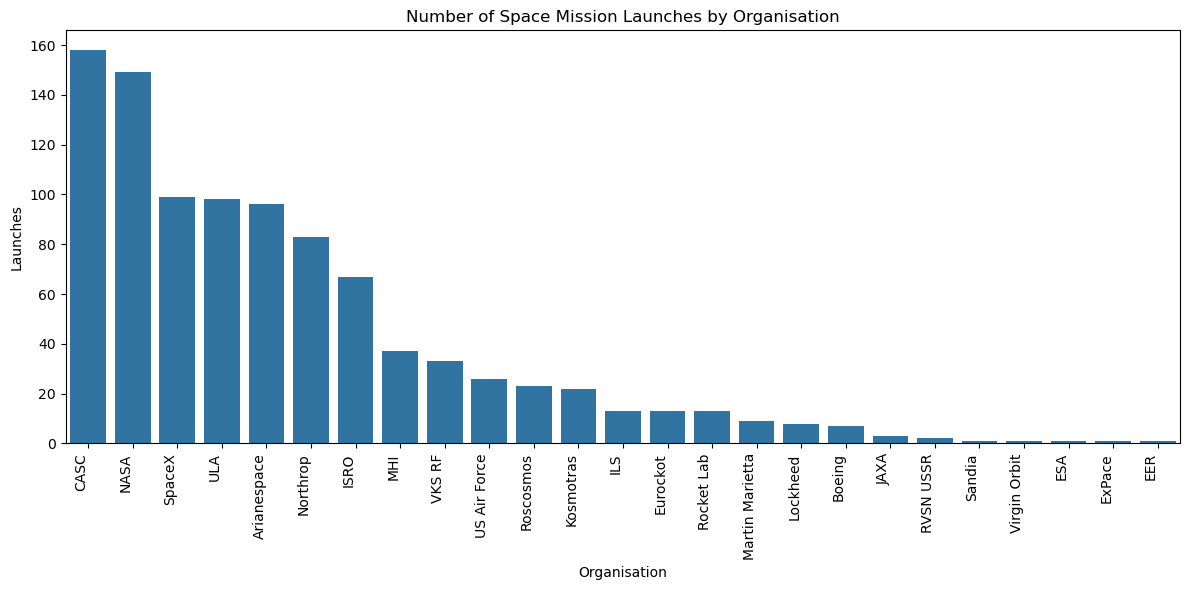

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count number of launches per organisation
org_counts = dt['Organisation'].value_counts().reset_index()
org_counts.columns = ['Organisation', 'Launches']

plt.figure(figsize=(12, 6))
sns.barplot(data=org_counts, x='Organisation', y='Launches')
plt.xticks(rotation=90, ha='right')
plt.title('Number of Space Mission Launches by Organisation')
plt.tight_layout()
plt.show()


In [22]:
dt.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

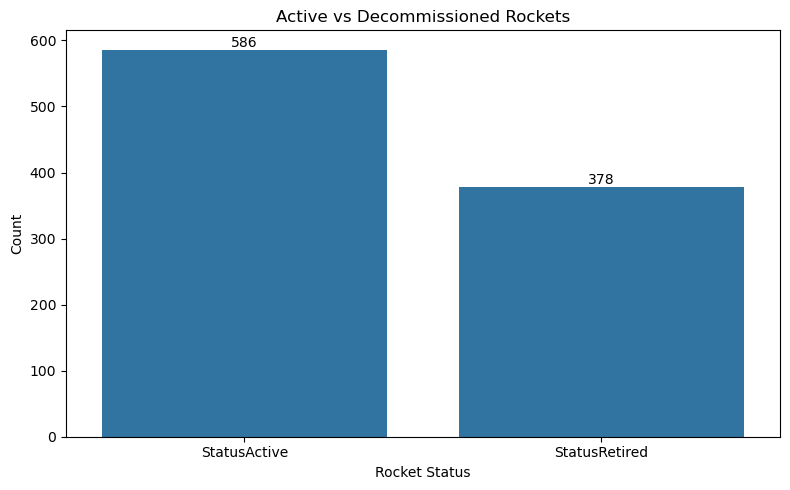

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count active vs decommissioned satellites (replace column name as needed)
status_counts = dt['Rocket_Status'].value_counts().reset_index()
status_counts.columns = ['Rocket Status', 'Count']

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=status_counts, x='Rocket Status', y='Count')
ax.bar_label(ax.containers[0])


plt.title('Active vs Decommissioned Rockets')
plt.tight_layout()
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

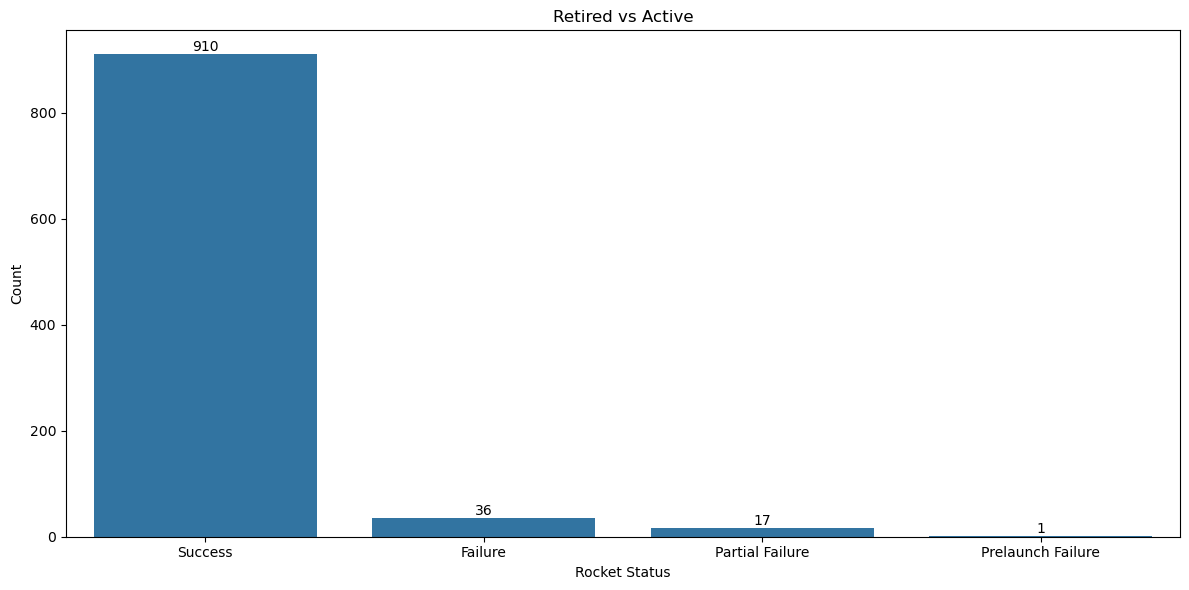

In [26]:
status_counts = dt['Mission_Status'].value_counts().reset_index()
status_counts.columns = ['Rocket Status', 'Count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=status_counts, x='Rocket Status', y='Count')
ax.bar_label(ax.containers[0])
plt.title("Retired vs Active")
plt.tight_layout()
plt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(dt, x='price')
plt.show()


ValueError: Could not interpret value `price` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
print(dt.columns)


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [78]:
dt['Location'].nunique()


56

In [80]:
df['Country'] = df['Location'].apply(lambda x: x.split()[-1])


In [82]:
country_corrections = {
    'Russia': 'Russian Federation',
    'New Mexico': 'United States of America',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'United States of America',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'United States of America'
}

df['Country'] = df['Country'].replace(country_corrections)


In [84]:
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except:
        return None

df['iso_alpha'] = df['Country'].apply(get_alpha3)


In [86]:
launch_counts = df.groupby('iso_alpha').size().reset_index(name='Launch_Count')


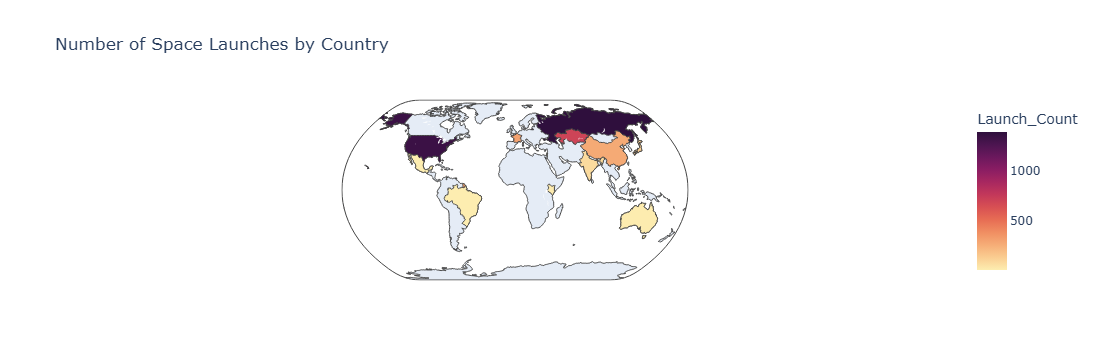

In [88]:
fig = px.choropleth(
    data_frame=launch_counts,
    locations='iso_alpha',
    color='Launch_Count',
    color_continuous_scale='matter',
    projection='natural earth',
    title='Number of Space Launches by Country'
)

fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [49]:
dt['Price'] = pd.to_numeric(dt['Price'], errors='coerce')
org_spending = dt.groupby('Organisation')['Price'].sum().reset_index()
org_spending.columns = ['Organisation', 'Total_Spent']
org_spending_sorted = org_spending.sort_values(by='Total_Spent', ascending=False)



C:\Users\12vat\AppData\Local\Temp\ipykernel_35072\1241206802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Price'] = pd.to_numeric(dt['Price'], errors='coerce')


In [51]:
print(org_spending_sorted)

       Organisation  Total_Spent
14             NASA    61,200.00
0       Arianespace    16,345.00
21              ULA    14,798.00
2              CASC     6,340.26
20           SpaceX     5,444.00
15         Northrop     3,930.00
12              MHI     3,532.50
8              ISRO     2,177.00
22     US Air Force     1,550.92
23           VKS RF     1,548.90
7               ILS     1,320.00
1            Boeing     1,241.00
18        Roscosmos     1,187.50
13  Martin Marietta       721.40
10        Kosmotras       638.00
5          Eurockot       543.40
11         Lockheed       280.00
9              JAXA       168.00
17       Rocket Lab        97.50
4               ESA        37.00
6            ExPace        28.30
3               EER        20.00
19           Sandia        15.00
24     Virgin Orbit        12.00
16        RVSN USSR         0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [54]:
launch_analysis = dt.groupby('Organisation')['Price'].agg(['sum', 'count']).reset_index()
launch_analysis.columns = ['Organisation', 'Total_Spent', 'Number_of_Launches']


In [56]:
launch_analysis['Avg_Spent_per_Launch'] = 0
mask = launch_analysis['Number_of_Launches'] > 0
launch_analysis.loc[mask, 'Avg_Spent_per_Launch'] = launch_analysis['Total_Spent'] / launch_analysis['Number_of_Launches']

C:\Users\12vat\AppData\Local\Temp\ipykernel_35072\2650258862.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[170.26041667 177.28571429  40.12822785  20.          37.
  41.8         28.3        101.53846154  32.49253731  56.
  29.          35.          95.47297297  80.15555556 450.
  47.34939759   7.5         51.63043478  15.          54.98989899
 151.          59.65076923  46.93636364  12.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  launch_analysis.loc[mask, 'Avg_Spent_per_Launch'] = launch_analysis['Total_Spent'] / launch_analysis['Number_of_Launches']


In [60]:
launch_analysis_sorted = launch_analysis.sort_values(by='Avg_Spent_per_Launch', ascending=False)
print(launch_analysis_sorted)

       Organisation  Total_Spent  Number_of_Launches  Avg_Spent_per_Launch
14             NASA    61,200.00                 136                450.00
1            Boeing     1,241.00                   7                177.29
0       Arianespace    16,345.00                  96                170.26
21              ULA    14,798.00                  98                151.00
7               ILS     1,320.00                  13                101.54
12              MHI     3,532.50                  37                 95.47
13  Martin Marietta       721.40                   9                 80.16
22     US Air Force     1,550.92                  26                 59.65
9              JAXA       168.00                   3                 56.00
20           SpaceX     5,444.00                  99                 54.99
18        Roscosmos     1,187.50                  23                 51.63
15         Northrop     3,930.00                  83                 47.35
23           VKS RF     1

# Chart the Number of Launches per Year

In [99]:
launch_analysis = dt.groupby('Organisation')['Date'].agg(['count']).reset_index()
launch_analysis.columns = ['Organisation', 'Launch_Count']

In [101]:
launch_sorted = launch_analysis.sort_values(by='Launch_Count', ascending=True)
print(launch_sorted)

       Organisation  Launch_Count
24     Virgin Orbit             1
6            ExPace             1
4               ESA             1
19           Sandia             1
3               EER             1
16        RVSN USSR             2
9              JAXA             3
1            Boeing             7
11         Lockheed             8
13  Martin Marietta             9
5          Eurockot            13
7               ILS            13
17       Rocket Lab            13
10        Kosmotras            22
18        Roscosmos            23
22     US Air Force            26
23           VKS RF            33
12              MHI            37
8              ISRO            67
15         Northrop            83
0       Arianespace            96
21              ULA            98
20           SpaceX            99
14             NASA           149
2              CASC           158


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [104]:
plt.figure(figsize=(12,6))
dt.plot(x = 'Avg_Spent_per_Launch',y = 'Date' )
plt.show()

KeyError: 'Avg_Spent_per_Launch'

<Figure size 1200x600 with 0 Axes>

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 